<a href="https://colab.research.google.com/github/maangelos/odg-ufrpe/blob/master/odg_ufrpe_selecao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Aluna: Marianna Alves Angelos
*   Dataset: https://www.kaggle.com/uciml/iris
*   **Objetivo**: classificar a qual espécie pertence. (Classificação com Aprendizagem supervisionada) 


*   Documentação pandas: https://pandas.pydata.org/pandas-docs/stable/
*   Documentação e tutorial seaborn: https://seaborn.pydata.org/introduction.html
*   Curso: https://www.alura.com.br/curso-online-machine-learning-introducao-a-classificacao-com-sklearn














In [0]:
import pandas as pd 

In [0]:
dados = pd.read_csv('Iris.csv')
dados = dados

**Visualizações descritivas dos dados**

In [294]:
dados.head()

,Id,SepalaComprimentoCm,SepalaLarguraCm,PetalaComprimentoCm,PetalaLarguraCm,Especies
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [293]:
dados.describe()

,Id,SepalaComprimentoCm,SepalaLarguraCm,PetalaComprimentoCm,PetalaLarguraCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [186]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Renomeando os nomes das colunas com o uso de dicionário**

In [193]:
renomes = {'SepalLengthCm':'SepalaComprimentoCm',
           'SepalWidthCm':'SepalaLarguraCm',
           'PetalLengthCm':'PetalaComprimentoCm',
           'PetalWidthCm':'PetalaLarguraCm',
           'Species':'Especies'}
dados = dados.rename(columns = renomes)
dados   

,Id,SepalaComprimentoCm,SepalaLarguraCm,PetalaComprimentoCm,PetalaLarguraCm,Especies
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Dividindo as colunas entre as colunas das features (*x,dados da sépalas* e pétalas) e a coluna da classificação (*y,dados das espécies)*. A coluna Id não será utilizada *** 

In [0]:
x= dados[['SepalaComprimentoCm','SepalaLarguraCm','PetalaComprimentoCm','PetalaLarguraCm']]
y= dados['Especies']

**Verificando o formato dos dados (x e y)**

In [190]:
x.shape

(150, 4)

In [191]:
y.shape

(150,)


**Importar módulos do scikit-learn**
*   **train_test_split ->** dividir os dados entre dados de treino e dados de teste
*   **LinearSVC ->** estimador
*   **accuracy_score ->** taxa de precisão






In [192]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
qnt_treino = len(treino_x)
qnt_teste = len(teste_x)

print("Quantidade de dados para treino: ",qnt_treino)
print("Quantidade de dados para teste: ",qnt_teste)

modelo = LinearSVC(random_state = 0, max_iter=4000)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("Taxa de precisão: %.2f%%" % acuracia)

Quantidade de dados para treino:  112
Quantidade de dados para teste:  38
Taxa de precisão: 97.37%


**Checando o array numpy das previsões**

In [171]:
previsoes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

**Checando as diferenças entre as previsões feitas pelo algoritmo e a classificação real**

In [0]:
comparacoes = (previsoes == teste_y)

In [167]:
comparacoes

47      True
73      True
74      True
129    False
67      True
89      True
143     True
21      True
108     True
12      True
147     True
76      True
119    False
35      True
28      True
122     True
13      True
58      True
114     True
57      True
50      True
149     True
111     True
20      True
72      True
81      True
98      True
34      True
104     True
133    False
95      True
88      True
0       True
46      True
11      True
106     True
85      True
1       True
Name: Especies, dtype: bool

**Checando a quantidade de acertos entre a previsão e a classificação real**

In [173]:
corretos = (previsoes == teste_y).sum()
corretos

35

**Checando a proporção nos dados de classificação de treino e teste**

In [194]:
treino_y.value_counts() 

Iris-setosa        38
Iris-virginica     37
Iris-versicolor    37
Name: Especies, dtype: int64

In [195]:
teste_y.value_counts()


Iris-virginica     13
Iris-versicolor    13
Iris-setosa        12
Name: Especies, dtype: int64

**Gráficos sobre o dataset**

**MATPLOTLIB**

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Quantidade')

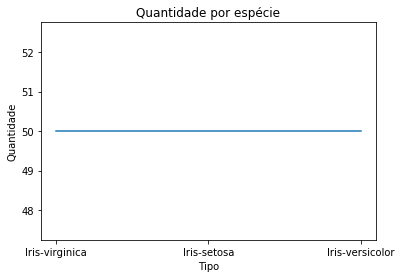

In [221]:
especies = dados['Especies']
valores = especies.value_counts()
nomes_especies = list(valores.index)
qnt_especies = list(valores)
plt.plot(nomes_especies, qnt_especies)
plt.title('Quantidade por espécie')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')


Text(0, 0.5, 'Quantidade')

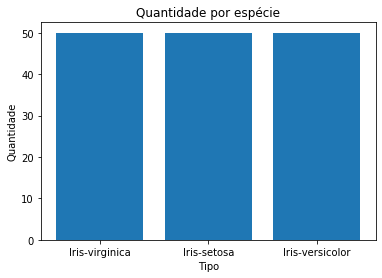

In [296]:
plt.bar(nomes_especies, qnt_especies)
plt.title('Quantidade por espécie')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')

**SEABORN**

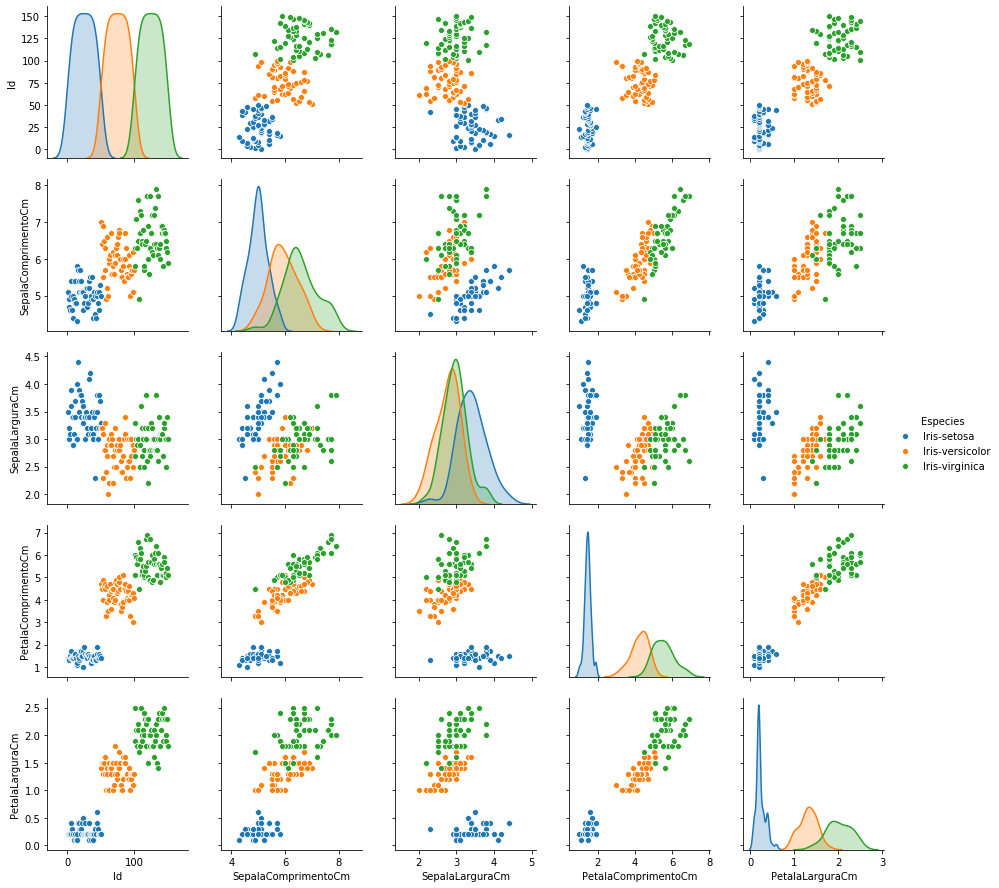

In [292]:
import seaborn as sns
sns.pairplot(dados, hue = 'Especies') #diferenciando a cor pelo tipo de especie